# Economic Data Analysis 

We will be doing some real world data analysis on economic data, using **pandas** and we will be scraping the data from [FRED](https://fred.stlouisfed.org/) using their API.

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
from fredapi import Fred

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

In [4]:
pd.options.display.max_columns = 500

In [5]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [12]:
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.environ.get('FRED_API_KEY')

## 1. Create the Fred object

In [14]:
fred = Fred(api_key)

## 2. Search Fred for data

In [20]:
sp_search = fred.search('S&P', order_by='popularity')

In [21]:
sp_search.shape # The number of rows is set to 1000 by default, so that you don't accidentally pull too much data

(1000, 15)

In [22]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-03-11,2023-03-11,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-03-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-10 09:18:10-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-03-11,2023-03-11,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-03-11,2023-03-11,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-03-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-10 09:18:14-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-03-11,2023-03-11,S&P 500,2013-03-11,2023-03-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-03-10 19:10:59-06:00,83,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-03-11,2023-03-11,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,82,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCIYISBBA066NRUG,HCIYISBBA066NRUG,2023-03-11,2023-03-11,Index of Human Capital per Person for Barbados,1960-01-01,2019-01-01,Annual,A,Index,Index,Not Seasonally Adjusted,NSA,2021-01-21 13:33:42-06:00,3,"Index of human capital per person, based on ye..."
AVHWPESGA065NRUG,AVHWPESGA065NRUG,2023-03-11,2023-03-11,Average Annual Hours Worked by Persons Engaged...,1960-01-01,2019-01-01,Annual,A,Hours,Hours,Not Seasonally Adjusted,NSA,2021-01-21 13:29:40-06:00,3,Source ID: avh When using these data in your ...
DDDM01IRA156NWDB,DDDM01IRA156NWDB,2023-03-11,2023-03-11,Stock Market Capitalization to GDP for Islamic...,1975-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:23:18-05:00,3,Total value of all listed shares in a stock ma...


## 3. Get the raw data and Plot

In [25]:
sp500 = fred.get_series(series_id='SP500')

In [26]:
sp500

2013-03-11    1556.22
2013-03-12    1552.48
2013-03-13    1554.52
2013-03-14    1563.23
2013-03-15    1560.70
               ...   
2023-03-06    4048.42
2023-03-07    3986.37
2023-03-08    3992.01
2023-03-09    3918.32
2023-03-10    3861.59
Length: 2610, dtype: float64

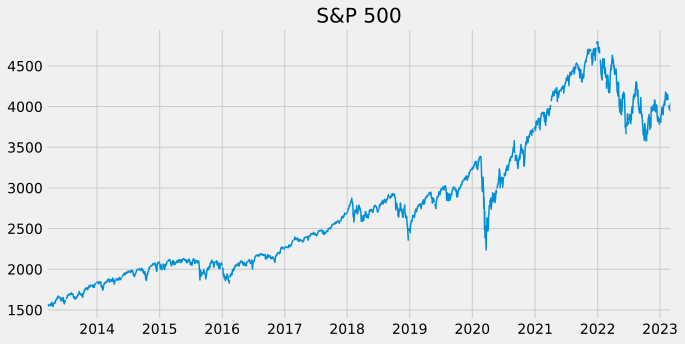

In [31]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=1.5)
plt.show()

## 4. Pull and Join multiple Data Series

In [32]:
unempl_results = fred.search('unemployment')

In [34]:
unempl_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-11,2023-03-11,Unemployment Rate,1948-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-10 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-11,2023-03-11,Unemployment Rate,1948-01-01,2023-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-03-10 07:43:02-06:00,59,The unemployment rate represents the number of...
NROU,NROU,2023-03-11,2023-03-11,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,69,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-03-11,2023-03-11,Unemployment Level,1948-01-01,2023-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-03-10 07:44:07-06:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2023-03-11,2023-03-11,Continued Claims (Insured Unemployment),1967-01-07,2023-02-25,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-03-09 07:33:03-06:00,73,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLIN426URN,FLIN426URN,2023-03-11,2023-03-11,"Unemployment Rate in Flint, MI (MSA)",1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:07:14-06:00,9,None
LRUN64TTEZQ156S,LRUN64TTEZQ156S,2023-03-11,2023-03-11,Unemployment Rate: Aged 15-64: All Persons for...,2005-01-01,2022-07-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2023-01-13 11:17:05-06:00,9,OECD descriptor ID: LRUN64TT OECD unit ID: STS...
PHIL942URN,PHIL942URN,2023-03-11,2023-03-11,Unemployment Rate in Philadelphia-Camden-Wilmi...,1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:23:07-06:00,8,None


In [35]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-10-01    3.7
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
Length: 902, dtype: float64

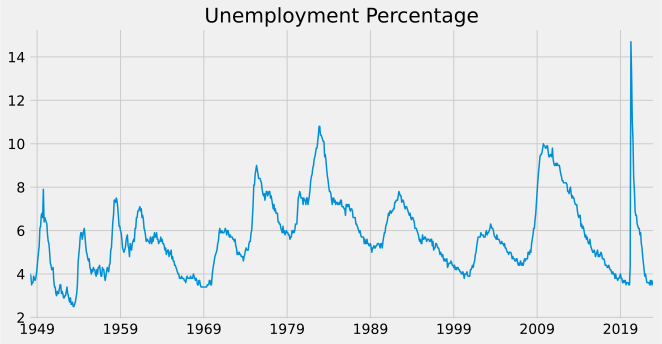

In [37]:
unrate.plot(figsize=(10, 5), title='Unemployment Percentage', lw=1.5)
plt.show()

In [47]:
# Unemployment metadata frame
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units=="Percent"')
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]